# GREEK OCR DATASET EXPLORATION

In this notebook I explore the dataset and install dependencies that I will need for my project.

## 1. Environment Setup




In [9]:
# Install dependencies
%pip install -q scikit-learn scipy lxml torch torchvision


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from bs4 import BeautifulSoup
from collections import Counter, defaultdict
import glob

# Set matplotlib style
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

print("All libraries imported successfully!")


All libraries imported successfully!


## 2. Dataset Overview


In [5]:
# Define dataset path
DATASET_PATH = 'GRPOLY_Dataset'

# Count files
subdirs = [d for d in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, d))]

total_images = 0
total_xml = 0

for subdir in subdirs:
    subdir_path = os.path.join(DATASET_PATH, subdir)
    images = len(glob.glob(os.path.join(subdir_path, '*.jpg'))) + \
             len(glob.glob(os.path.join(subdir_path, '*.JPG'))) + \
             len(glob.glob(os.path.join(subdir_path, '*.tif')))
    xmls = len(glob.glob(os.path.join(subdir_path, '*.xml')))
    total_images += images
    total_xml += xmls
    print(f"{subdir}: {images} images, {xmls} annotations")

print(f"\n✓ Total: {total_images} images, {total_xml} XML files")



GRPOLY-DB-MachinePrinted-C: 630 images, 315 annotations
GRPOLY-DB-MachinePrinted-B1: 12 images, 6 annotations
GRPOLY-DB-Handwritten: 92 images, 46 annotations
GRPOLY-DB-MachinePrinted-A: 5 images, 5 annotations
GRPOLY-DB-MachinePrinted-B2: 10 images, 5 annotations
GRPOLY-DB-MachinePrinted-B3: 36 images, 18 annotations
GRPOLY-DB-MachinePrinted-B4: 8 images, 4 annotations

✓ Total: 793 images, 399 XML files


In [6]:
# Count files in each subdirectory
def count_files_by_type(directory):
    """Count files by extension in a directory"""
    file_counts = defaultdict(int)
    for file in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, file)):
            ext = os.path.splitext(file)[1].lower()
            file_counts[ext] += 1
    return dict(file_counts)

print("\nFile Counts by Subdirectory:")
print("=" * 70)
for subdir in subdirs:
    subdir_path = os.path.join(DATASET_PATH, subdir)
    file_counts = count_files_by_type(subdir_path)
    print(f"\n{subdir}:")
    for ext, count in sorted(file_counts.items()):
        print(f"  {ext}: {count} files")



File Counts by Subdirectory:

GRPOLY-DB-MachinePrinted-C:
  .jpg: 315 files
  .tif: 315 files
  .xml: 315 files

GRPOLY-DB-MachinePrinted-B1:
  .jpg: 6 files
  .tif: 6 files
  .xml: 6 files

GRPOLY-DB-Handwritten:
  .jpg: 46 files
  .tif: 46 files
  .xml: 46 files

GRPOLY-DB-MachinePrinted-A:
  .tif: 5 files
  .xml: 5 files

GRPOLY-DB-MachinePrinted-B2:
  .jpg: 5 files
  .tif: 5 files
  .xml: 5 files

GRPOLY-DB-MachinePrinted-B3:
  .jpg: 18 files
  .tif: 18 files
  .xml: 18 files

GRPOLY-DB-MachinePrinted-B4:
  .jpg: 4 files
  .tif: 4 files
  .xml: 4 files


## 3. Parse XML Annotations

Each XML file contains annotations with: 
Glyph coordinates (bounding boxes)
Greek characters (Unicode text)
Word and line level annotations

In [7]:
# Extract characters from XML files
all_chars = []

for subdir in subdirs:
    xml_files = glob.glob(os.path.join(DATASET_PATH, subdir, '*.xml'))
    for xml_file in xml_files:
        try:
            with open(xml_file, 'r', encoding='utf8') as f:
                soup = BeautifulSoup(f.read(), 'xml')
            
            # Get text from Unicode tags
            for unicode_tag in soup.find_all('Unicode'): 
                text = unicode_tag.get_text()
                for char in text:
                    if char.strip():
                        all_chars.append(char)
        except:
            continue

char_counts = Counter(all_chars)

print(f"Total characters: {len(all_chars):,}")
print(f"Unique characters: {len(char_counts)}")
print(f"\nTop 10 characters:")
for char, count in char_counts.most_common(10):
    print(f"  '{char}': {count:,}")


Total characters: 1,252,840
Unique characters: 285

Top 10 characters:
  'ν': 99,631
  'τ': 88,107
  'α': 84,827
  'ο': 80,437
  'ε': 61,470
  'ι': 54,124
  'ς': 50,467
  'ρ': 45,444
  'π': 42,649
  'σ': 39,942


## Character Distribution Analysis


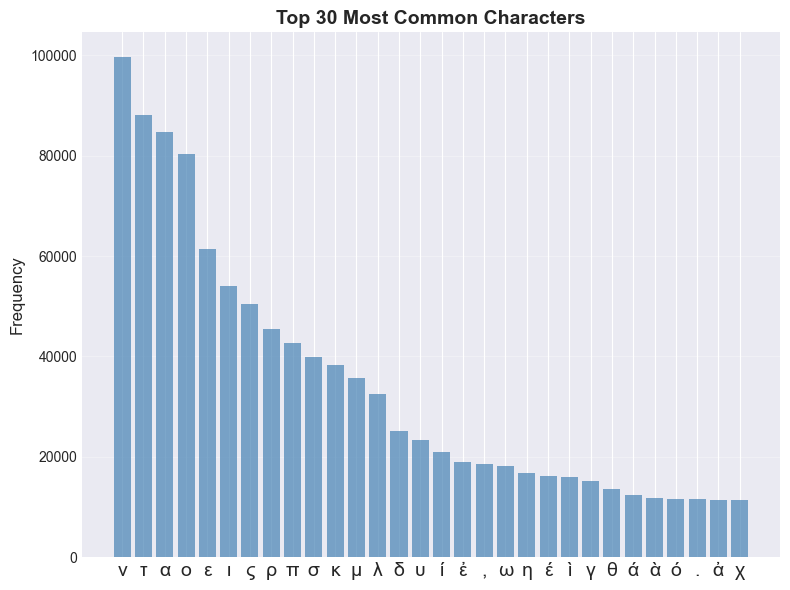


Distribution Statistics:
  Mean frequency: 4395.93
  Median frequency: 235.00
  Min frequency: 1
  Max frequency: 99,631


In [18]:
# Visualize character distribution


# Plot top 30 characters
top_chars = char_counts.most_common(30)
chars, counts = zip(*top_chars)
plt.figure(figsize=(8, 6))
plt.bar(range(len(chars)), counts, color='steelblue', alpha=0.7)
plt.xticks(range(len(chars)), chars, rotation=0, fontsize=14)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 30 Most Common Characters', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)


# Plot distribution histogram
freq_values = list(char_counts.values())


plt.tight_layout()
plt.show()

# Print statistics
print(f"\nDistribution Statistics:")
print(f"  Mean frequency: {np.mean(freq_values):.2f}")
print(f"  Median frequency: {np.median(freq_values):.2f}")
print(f"  Min frequency: {np.min(freq_values)}")
print(f"  Max frequency: {np.max(freq_values):,}")


## Visualize Sample Images


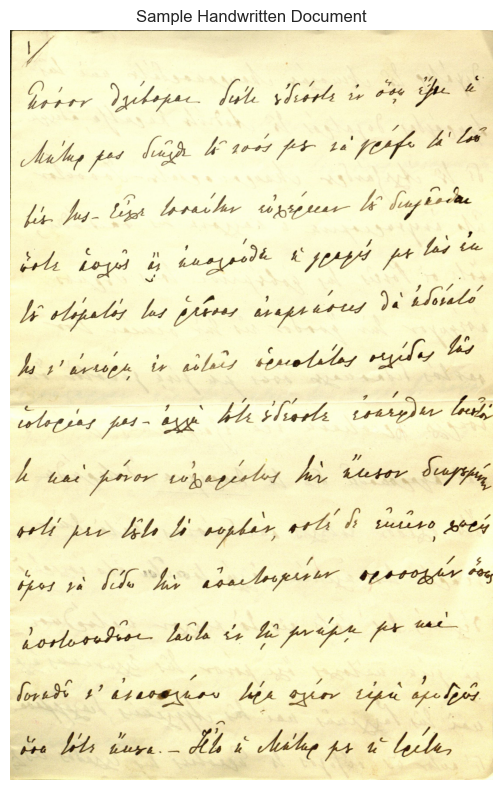

In [25]:
# Display a sample image
sample_img = os.path.join(DATASET_PATH, 'GRPOLY-DB-Handwritten', '_0001.JPG')
img = cv2.imread(sample_img)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.imshow(img_rgb)
plt.title('Sample Handwritten Document')
plt.axis('off')
plt.tight_layout()
plt.show()

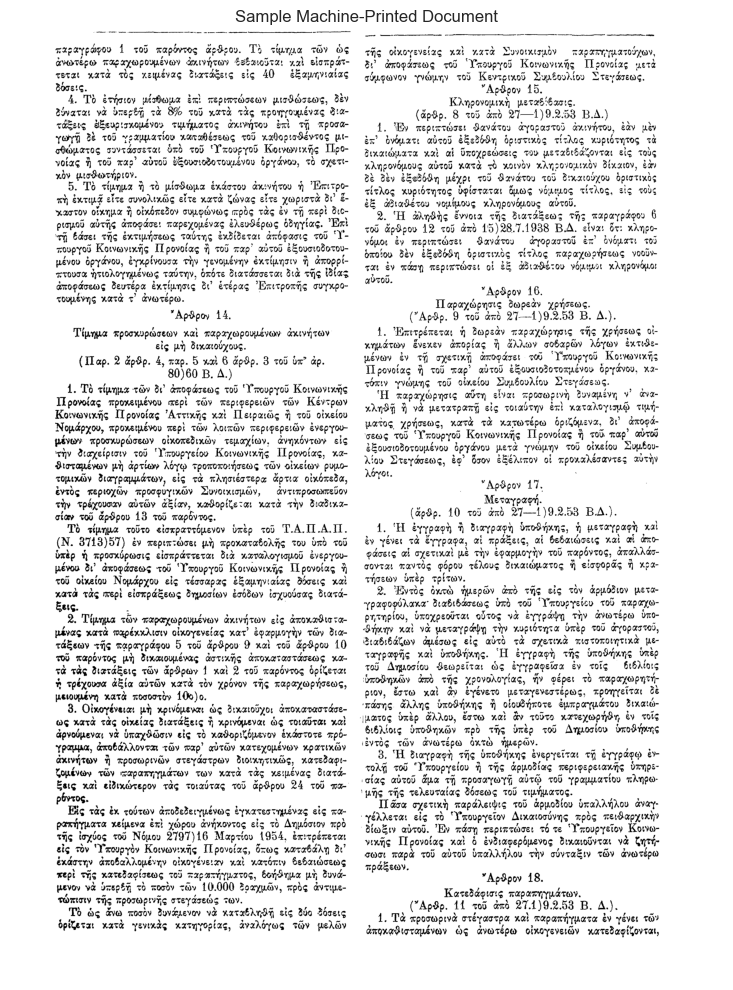

In [ ]:
# Visualize sample from machine-printed dataset
machine_img = os.path.join(DATASET_PATH, 'GRPOLY-DB-MachinePrinted-A', 'im1.tif')
img = cv2.imread(machine_img)
plt.figure(figsize=(15, 10))
plt.imshow(img) 
plt.title('Sample Machine-Printed Document')
plt.axis('off')
plt.tight_layout()
plt.show()


## Environment Verification


In [20]:
import torch
import torchvision

print(f"PyTorch: {torch.__version__}")
print(f"Torchvision: {torchvision.__version__}")
print(f"NumPy: {np.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print("\n✓ Environment ready!")



PyTorch: 2.8.0
Torchvision: 0.23.0
NumPy: 2.2.6
CUDA available: False

✓ Environment ready!


## Summary

**Dataset:** 200+ unique Greek characters with severe class imbalance  
**Challenge:** 25%+ classes have ≤4 samples  
Ready for training!
